# Task 4 - To Explore Decision Tree Algorithm

- For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Imorting Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum() #to check missing values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Visualizing data 

<Figure size 360x144 with 0 Axes>

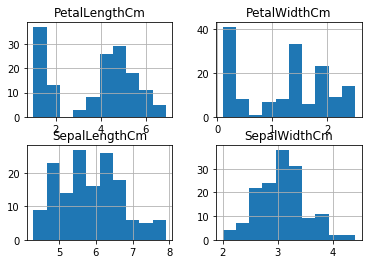

In [8]:
plt.figure(figsize=(5,2))
df.hist()
plt.show()

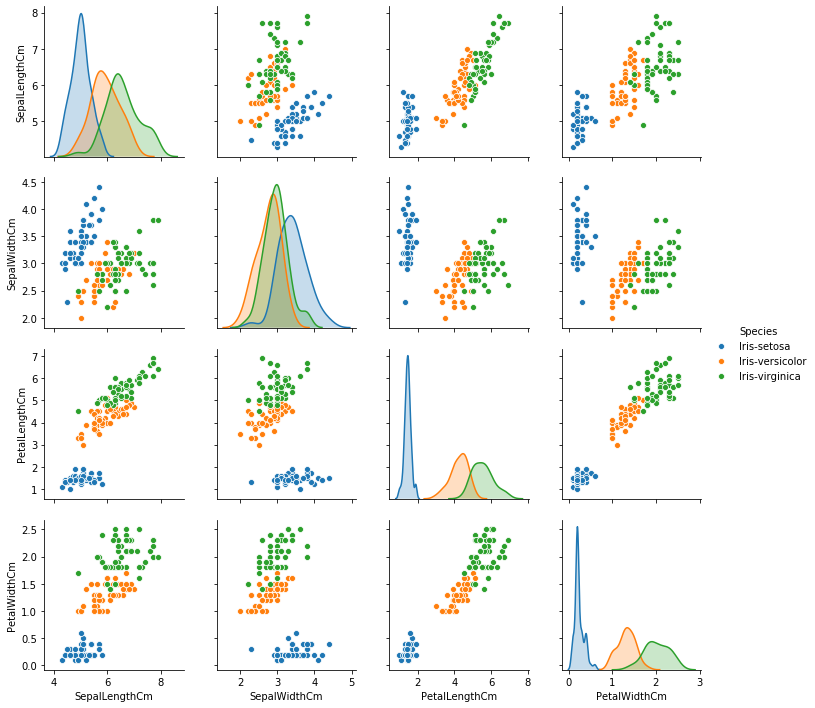

In [9]:
sns.pairplot(df.iloc[:,[0,1,2,3,4]],hue='Species')
plt.show()

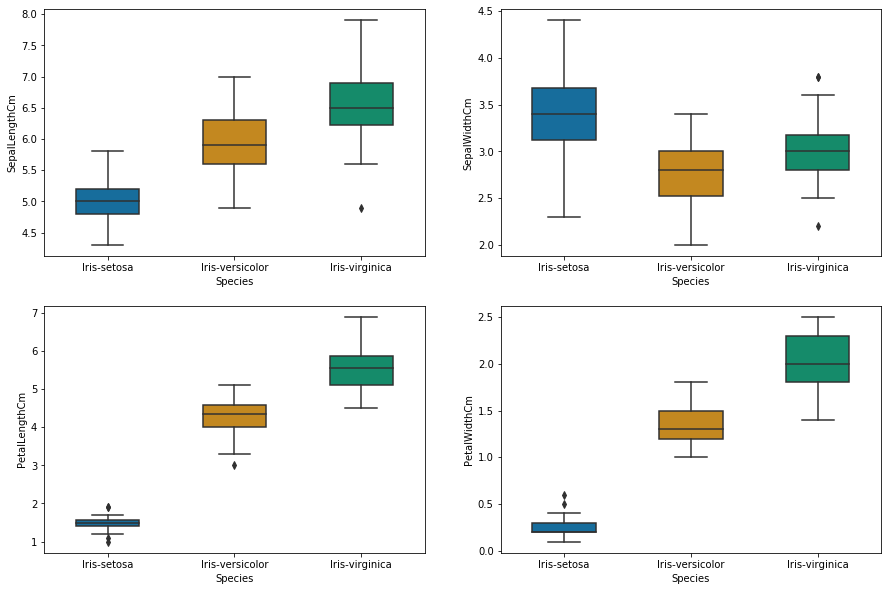

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y='SepalLengthCm',x='Species', data=df, width=0.5, palette="colorblind")
plt.subplot(2,2,2)
sns.boxplot(y='SepalWidthCm',x='Species', data=df, width=0.5, palette="colorblind")
plt.subplot(2,2,3)
sns.boxplot(y='PetalLengthCm',x='Species', data=df, width=0.5, palette="colorblind")
plt.subplot(2,2,4)
sns.boxplot(y='PetalWidthCm',x='Species', data=df, width=0.5, palette="colorblind")
plt.show()

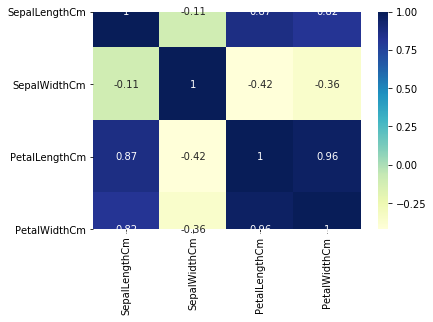

In [11]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True)

## Preparing Data

In [12]:
X= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=df[['Species']].values

In [13]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
y = encoder.fit_transform(y)

## Defining the Decision Tree Algorithm

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=42)

In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy of training data :  100.0 %
Confusin matrix of training data :
  [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]


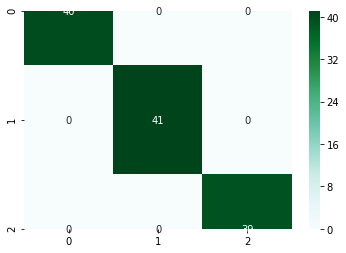

In [16]:
# Accuracy For training data
from sklearn.metrics import accuracy_score,confusion_matrix
predict = dtree.predict(Xtrain)
print("Accuracy of training data : ",accuracy_score(predict,ytrain)*100,"%")
print("Confusin matrix of training data :\n ",confusion_matrix(predict,ytrain))
sns.heatmap(confusion_matrix(predict,ytrain),annot = True,cmap = 'BuGn')

Accuracy of testing data:  100.0 %
Confusin matrix of testing data :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


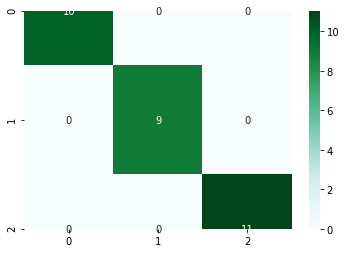

In [17]:
# Accuracy For testing data
predict = dtree.predict(Xtest)
print("Accuracy of testing data: ",accuracy_score(predict,ytest)*100,"%")
print("Confusin matrix of testing data :\n",confusion_matrix(predict,ytest))
sns.heatmap(confusion_matrix(predict,ytest),annot = True,cmap = 'BuGn')

[Text(286.15384615384613, 841.2857142857143, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolour'),
 Text(214.61538461538458, 711.8571428571429, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(357.6923076923077, 711.8571428571429, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolour'),
 Text(143.07692307692307, 582.4285714285714, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolour'),
 Text(71.53846153846153, 453.00000000000006, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolour'),
 Text(214.61538461538458, 453.00000000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(572.3076923076923, 582.4285714285714, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(357.6923076923077, 453.00000000000006, 'petal length (cm) <= 4.95\ngini = 0.5\nsample

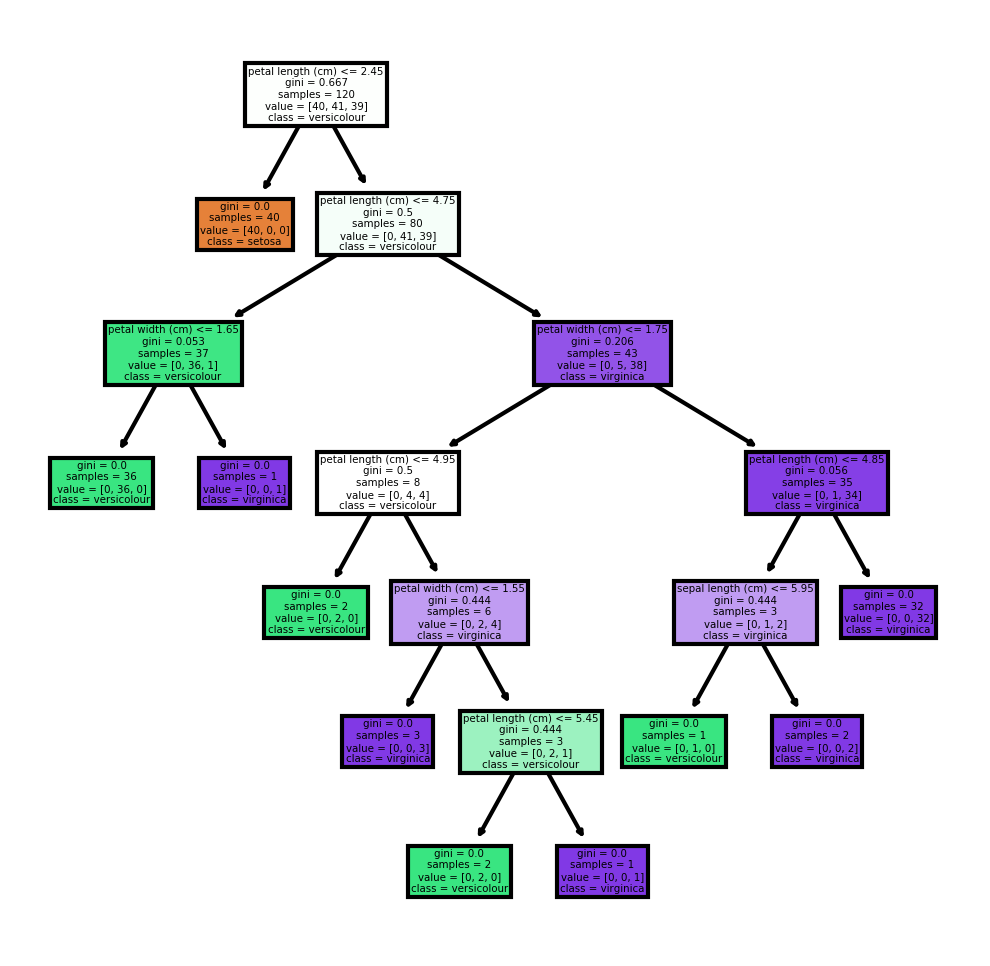

In [18]:
from sklearn import tree
names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes= ['setosa','versicolour','virginica']
fig,axes= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dtree, feature_names=names, class_names=classes, filled=True)

## Applying Decision Tree Algorithm on whole Dataset

In [19]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(464.99999999999994, 830.5, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(393.46153846153845, 679.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(536.5384615384615, 679.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolour'),
 Text(286.15384615384613, 528.5, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolour'),
 Text(143.07692307692307, 377.5, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolour'),
 Text(71.53846153846153, 226.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolour'),
 Text(214.61538461538458, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(429.23076923076917, 377.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(357.6923076923077, 226.5, 'gini = 0.0\nsamples 

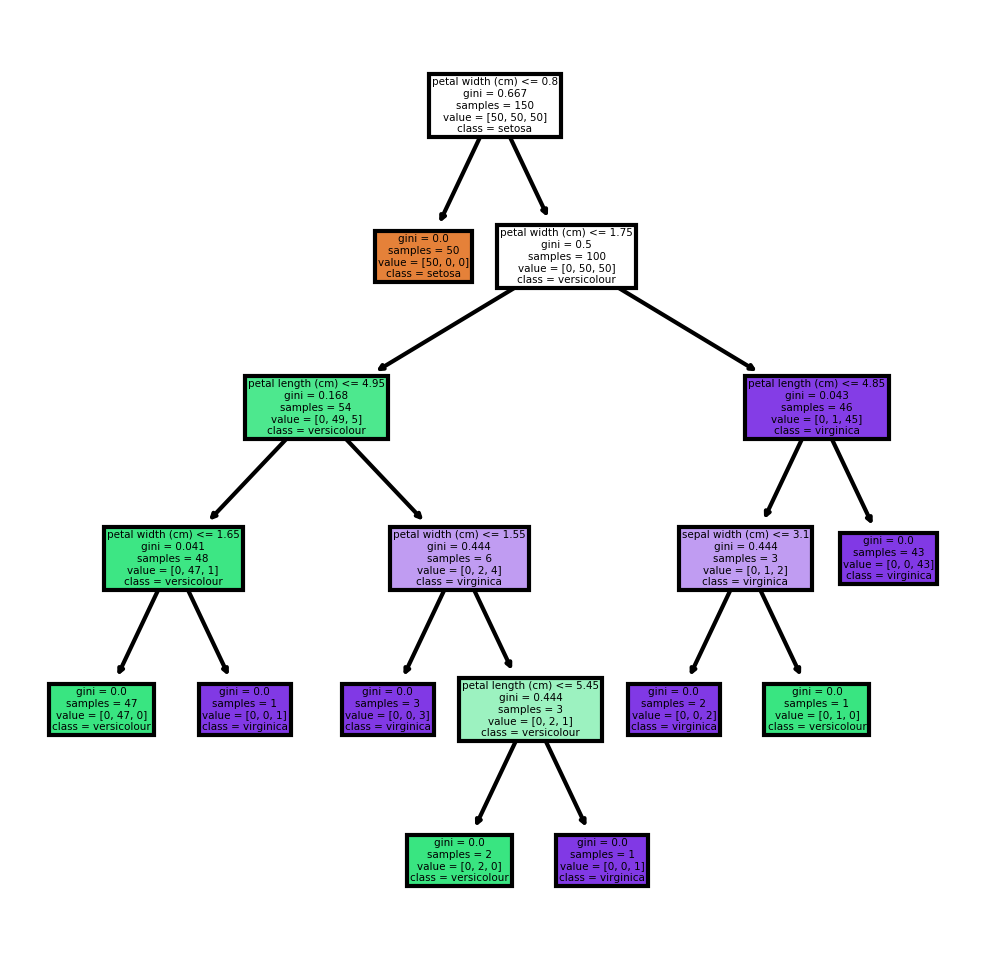

In [20]:
from sklearn import tree
names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes= ['setosa','versicolour','virginica']
fig,axes= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dtree1, feature_names=names, class_names=classes,filled=True)